## 03/18 Question

It's often hypothesized (and backed in some studies) that smiling can increase leniency, or reduce the effects of wrongdoing among other benefits.


    
A 1995 study by Marianne LaFrance & Marvin Hecht produced a dataset containing 4 different types of smiles, as well as the judge's leniency against judging wrongdoing when seeing these smiles.


    
The dataset can be interpreted as follows:


    
Smile:

1 - false smile

    
2 - is felt smile

    
3 - is miserable smile

    
4 - is neutral control

    

    
Leniency: a measure of how lenient the judgments were, higher means the judges were more lenient
    


    
Given the above information:


    

    
Plot the leniency by smile type in a parallel box plot

    
Based on the box plot above, which smile condition resulted in the highest leniency?

    
Is the median leniency for the false smile  lower than the 75th percentile leniency score for the neutral expression?

## Approach

To plot the requested data, I will use the boxplot feature in seaborn. I will plot the x variable, smile, against the y variable, leniency. 

For the second question, I will group the provided data by smile type and use the describe method to determine whether the median leniency for false smile is lower than the 75th percential score for a neutral expression.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/erood/interviewqs.com_code_snippets/master/Datasets/smile_leniency.csv')
df.head()

,smile,leniency
0,1,2.5
1,1,5.5
2,1,6.5
3,1,3.5
4,1,3.0


<AxesSubplot:xlabel='smile', ylabel='leniency'>

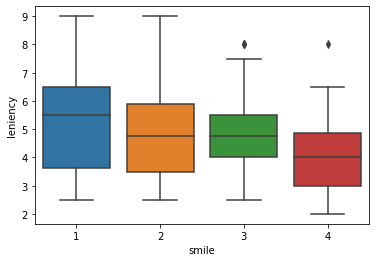

In [5]:
sns.boxplot(x="smile", y="leniency", data=df)

In [7]:
df.groupby(by="smile").describe()

leniency                                                  
         count      mean       std  min    25%   50%    75%  max
smile                                                           
1         34.0  5.367647  1.827023  2.5  3.625  5.50  6.500  9.0
2         34.0  4.911765  1.680866  2.5  3.500  4.75  5.875  9.0
3         34.0  4.911765  1.453682  2.5  4.000  4.75  5.500  8.0
4         34.0  4.117647  1.522850  2.0  3.000  4.00  4.875  8.0

Based on the above table, the median result for a false smile (1 smile score) is 5.5 while the 75th percentile for neutral (4 smile score) is 5.875. Therefore, we can see that the median score for a false smile is NOT less than the 75th percentile score for a neutral expression.

## 03/14 Question

Provided the following tables, write a SQL query to pull the average GPA (grade_point in table) by subject for completed classes.


                    

                    
 Table 1: student_classes


                    
Column Name	Data Type	Description
student_id	integer	id of the student
class_id	integer	will be a value between 0-12, which corresponds
subject	string	subject the class falls into
class_name	string	name of the class
complete	boolean	indicates if student has completed class

                    

                    

 Table 2: student_grades


                    
Column Name	Data Type	Description
student_id	integer	id of the student
class_id	integer	id of class student is enrolled in
grade_point	integer	grade point achieved, between 0.0 - 4.0 with one decimal increments

## Approach

To structure this query I will:
- group the data by student and subject so that each student's results and each subject are displayed individually
- select student id, subject, and average grade_point so that each category and average GPA are shown
- join the two tables on student_id and class_id so grades are only input for the corresponding student and correct class
- filter the table by the "complete" column so that only completed classes are considered

With the above structure, I will have an output showing a student's average GPA grouped by subject and for complete classes only.

## Solution

SELECT a.student_id, a.subject, AVG(b.grade_point) <br>
FROM student_classes a<br>
JOIN student_grades b<br>
ON a.student_id=b.student_id AND a.class_id=b.class_id<br>
GROUP BY a.student, a.subject<br>
HAVING a.complete=1<br>

## 03/09 Question

Suppose you are playing a game where there are two fair six-sided dice, and every time you roll the dice and they add up to 9, you win \\$50. However, to roll the dice costs \\$20 to play. Is this a game you're willing to play?

## Approach

This question is about probability and expected value concepts. In this scenario, there are 36 total combinations of dice possible since each die has 6 numbers on it. Of those combinations, only 4 yield a total result of 9: (6,3), (3,6), (5,4), (4,5). To calculate expected value of a roll, we multiply the probability of positive and negative outcomes by their values. In our case, good rolls lead to \\$50 and bad rolls lead to -\\$20. Thus the expected value is:

(4/36)\*\\$50 + (32/36)\*-\\$20 = -\\$12.21

Since the expected value of rolling the die is less than $0, we anticipate losing money each roll. __Consequently, this is not a game I am willing to play assuming my primary goal is NOT to lose money.__

## 03/07 Question

Suppose you are given P, which is list of j integer intervals, where j is the number of intervals. The intervals are in a format [a, b]. 


    
    
Given an integer z, can you return the number of overlapping intervals for point z?


    
For example:


    
    
#Input:
    

P =  [[0, 2], [3, 7], [4, 6], [7, 8], [1 ,5]]
    

z = 5
    

#Output:
    

3
   
At z = 5, there are 3 intervals that overlap. The intervals are: [3, 7], [4, 6], and [1, 5]

## Approach

To solve this problem, I will create a function that takes in an array and number. For each interval in the array, I will test whether or not the provided number is in between the numbers in that interval. If it is, I will add one to a counter/result variable.

I will then return the final tally of this result variable as the answer.

In [ ]:
def num_in_interval(num, arr):
    res=0
    for interval in arr:
        if interval[0]<=num<=interval[1]:
            res+=1
    return res